In [1]:
%pwd

'/Users/ryandevera/data-science/umn_environments/Constrained-Deep-Learning-Survey/notebooks'

In [2]:
%cd ..

/Users/ryandevera/data-science/umn_environments/Constrained-Deep-Learning-Survey


/Users/ryandevera/.virtualenvs/cdl-survey/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import numpy as np
import pandas as pd

from cdlsurvey.data import get_data, discretize_continuous_columns, get_data

In [5]:
# Define the columns that we want to use
# Categorical columns
CATEGORICAL_COLUMNS = [
    'workclass',
    'education',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'native_country',
]

# Continuous columns
CONTINUOUS_COLUMNS = [
    'age',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'education_num',
]

# All columns
COLUMNS = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income_bracket',
]

# label column
LABEL_COLUMN = 'label'

In [6]:
train_filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'  # noqa
test_filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'  # noqa

# Get the train and test data
train_df = pd.read_csv(train_filename, names=COLUMNS, skipinitialspace=True)
test_df = pd.read_csv(test_filename, names=COLUMNS, skipinitialspace=True, skiprows=1)

# Create the label column - the label is for the income bracket column
# and we identify anyone who makes over $50k
train_df[LABEL_COLUMN] = (
    train_df['income_bracket'].apply(lambda x: x == '>50K')
).astype(int)
test_df[LABEL_COLUMN] = (
    test_df['income_bracket'].apply(lambda x: x == '>50K')
).astype(int)

<Axes: ylabel='race'>

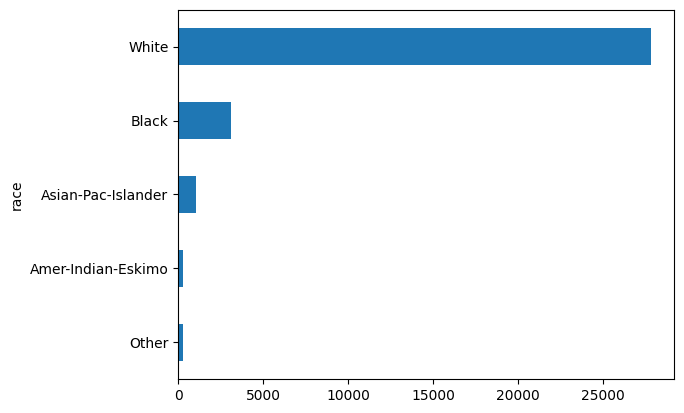

In [10]:
# Let's look at some of the general patterns against the label of race and gender
# we want to explore fairness
train_df['race'].value_counts().sort_values().plot(kind='barh')

In [11]:
train_df.groupby('race')['label'].mean()

race
Amer-Indian-Eskimo    0.115756
Asian-Pac-Islander    0.265640
Black                 0.123880
Other                 0.092251
White                 0.255860
Name: label, dtype: float64

In [ ]:
# Final dataset
train_df, test_df, feature_names = get_data()